# UNet

In [1]:
%load_ext autoreload
%autoreload

In [2]:
from deeply.model.unet import (
    UNet,
    AttentionUNet,
    Trainer,
    generate_toy
)
from deeply.plots import segplot, history_plot

In [3]:
width, height = (200, 200)

In [4]:
train, val, test = generate_toy(x = width, y = height)

#### Generate Samples

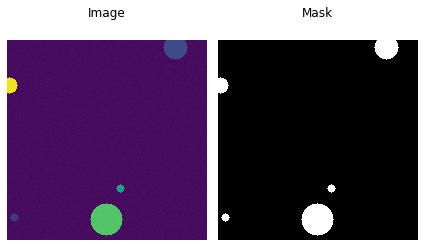

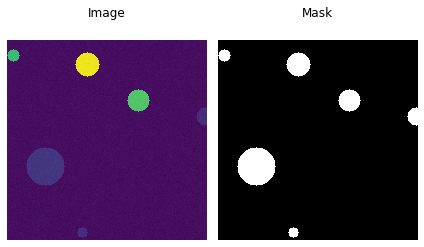

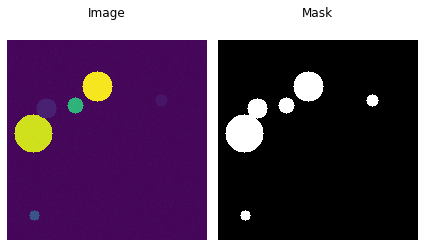

In [5]:
n_samples = 3
samples   = train.take(n_samples)

for image, mask in samples:
    segplot(image, mask)

In [9]:
unet = AttentionUNet(x = width, y = height, n_classes = 1, layer_depth = 2, init_filters = 16, final_activation = "sigmoid")

ValueError: in user code:

    /Users/achilles/dev/deeply/src/deeply/model/unet.py:252 call  *
        x = Add()([t, g])
    /Users/achilles/.venv/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1023 __call__  **
        self._maybe_build(inputs)
    /Users/achilles/.venv/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:2625 _maybe_build
        self.build(input_shapes)  # pylint:disable=not-callable
    /Users/achilles/.venv/lib/python3.9/site-packages/tensorflow/python/keras/utils/tf_utils.py:270 wrapper
        output_shape = fn(instance, input_shape)
    /Users/achilles/.venv/lib/python3.9/site-packages/tensorflow/python/keras/layers/merge.py:108 build
        output_shape = self._compute_elemwise_op_output_shape(output_shape, shape)
    /Users/achilles/.venv/lib/python3.9/site-packages/tensorflow/python/keras/layers/merge.py:79 _compute_elemwise_op_output_shape
        raise ValueError(

    ValueError: Operands could not be broadcast together with shapes (94, 94, 1) (86, 86, 1)


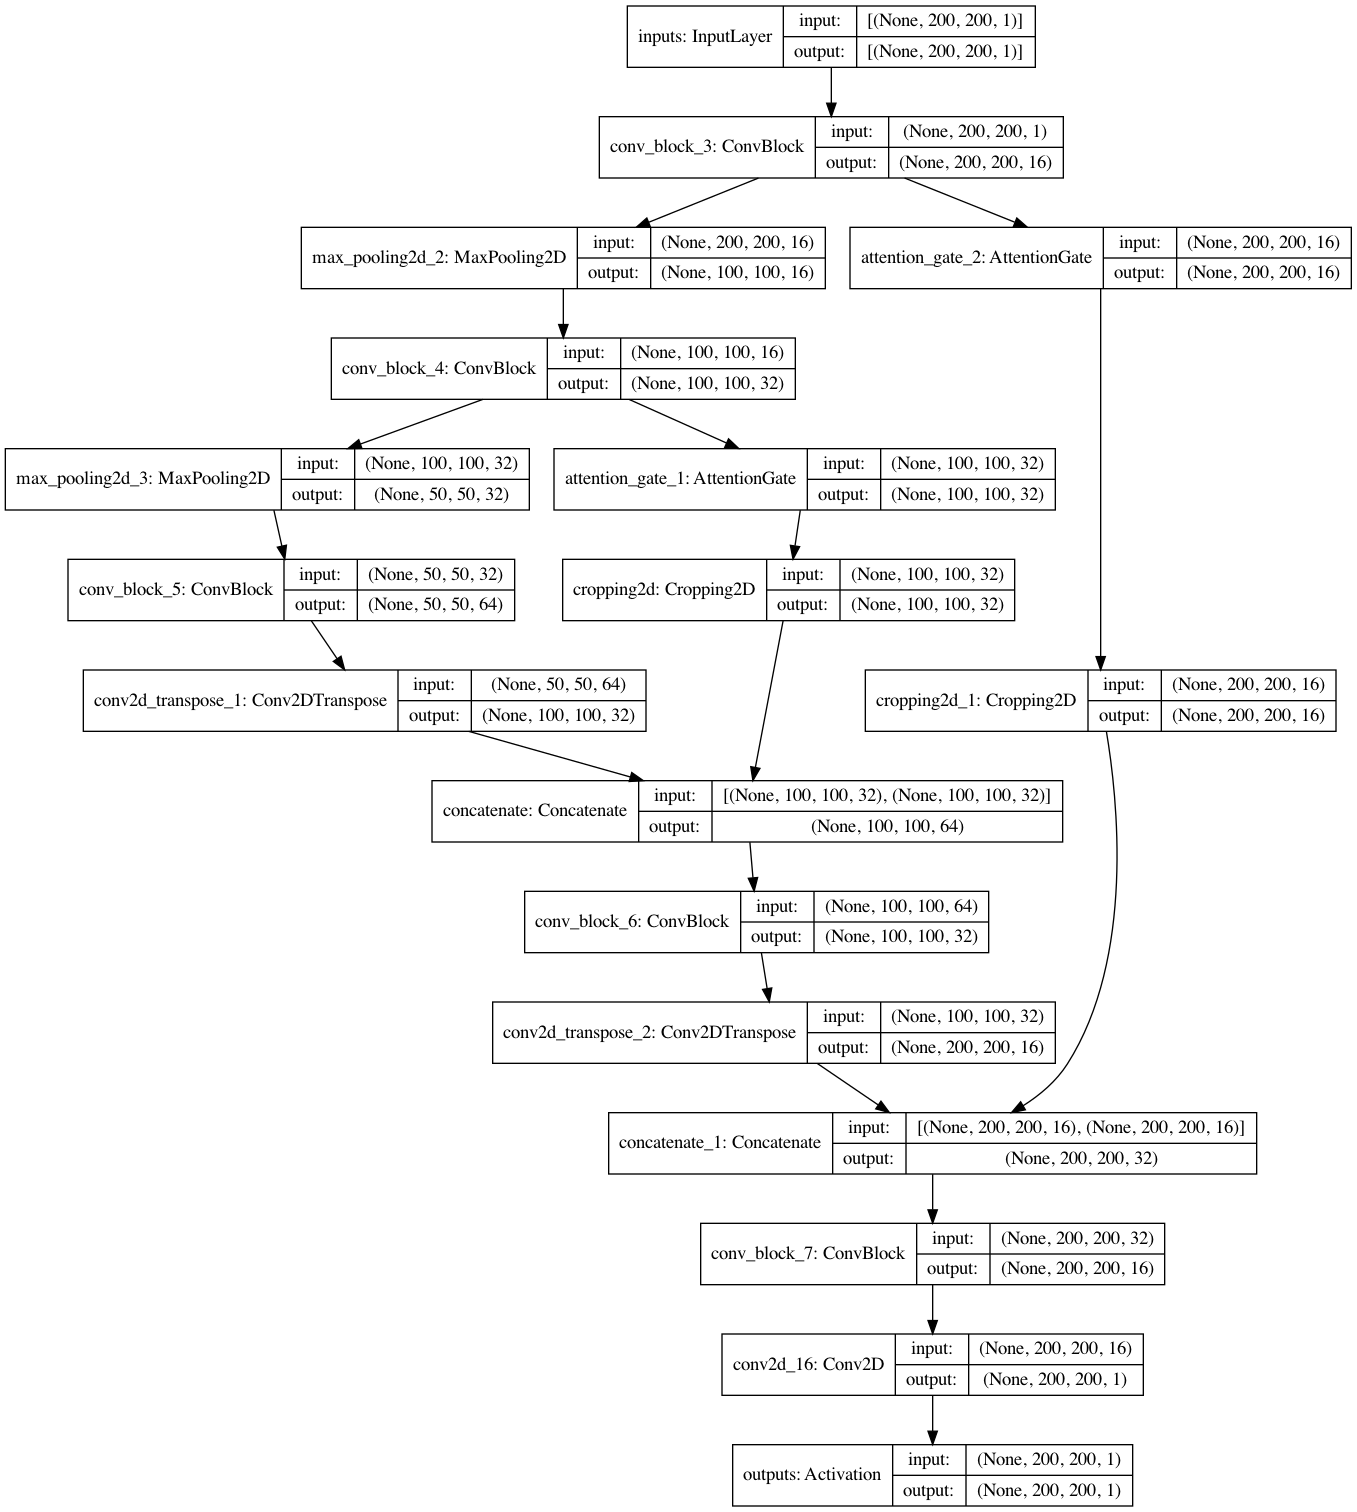

In [10]:
unet.plot(show_shapes = True)

In [ ]:
unet.compile(optimizer = "adam")

In [ ]:
batch_size = 1
epochs  = 20

In [ ]:
trainer = Trainer()
history = trainer.fit(unet, train, val = val, batch_size = batch_size, epochs = epochs)

In [ ]:
predicted = unet.predict(test.batch(batch_size))

In [ ]:
for i, (image, mask) in enumerate(test.take(n_samples)):
    segplot(image, mask, predicted[i])

In [ ]:
history_plot(history)